<a href="https://colab.research.google.com/github/deltorobarba/machinelearning/blob/master/forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Forecasting of Financial Data and Telemetry Data**

**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

time: 9.83 ms (started: 2021-03-11 08:03:42 +00:00)


In [ ]:
!pip install --quiet ipython-autotime pandas_gbq
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.45 s (started: 2021-03-11 08:03:47 +00:00)


# **Financial Time Series Forecasting on Google Cloud Platform**

## **Load Data**

**[Option 1] Load Data from Google Cloud Storage**

In [ ]:
# !gsutil cp gs://lunar-demo/series.csv .

**[Option 2] Load Data from BigQuery**

In [ ]:
_FINANCE_PROJECT_NAME = u"lunar-demo"

def run_finance_query(query, index_col="date"):
  return pd.read_gbq(
    query,
    project_id=_FINANCE_PROJECT_NAME,
    index_col=index_col,
    dialect="standard").sort_index()

time: 1.19 ms (started: 2021-03-11 08:03:58 +00:00)


In [ ]:
# 'financial data'
stockprice_raw = run_finance_query(
    "SELECT * FROM `lunar-demo.repo.timeseries` order by date asc")

time: 1.36 s (started: 2021-03-11 08:04:05 +00:00)


In [ ]:
stockprice_raw.head()

,google,apple,microsoft
date,,,
2010-02-01 00:00:00+00:00,265.51,280.42,299.63
2010-02-02 00:00:00+00:00,264.57,285.87,293.80
2010-02-03 00:00:00+00:00,269.40,279.49,297.20
2010-02-04 00:00:00+00:00,262.41,282.35,299.44
2010-02-05 00:00:00+00:00,264.65,284.06,302.08


time: 20.6 ms (started: 2021-03-11 08:04:08 +00:00)


**[Option 3] Load Data from Github**

In [ ]:
url = 'https://raw.githubusercontent.com/deltorobarba/repo/master/series.csv'
series_raw = pd.read_csv(url)
series_raw.head()

,date,price1,price2,price3
0,2010-02-01,265.514771,280.416718,299.634420
1,2010-02-02,264.568329,285.866858,293.798048
2,2010-02-03,269.400208,279.490699,297.201112
3,2010-02-04,262.406433,282.354225,299.442578
4,2010-02-05,264.653015,284.056413,302.076580


time: 233 ms (started: 2021-03-11 08:04:27 +00:00)


## **Display & Analyse Data**

In [ ]:
series = series_raw.set_index('date').rename(columns={"price1": "google", "price2": "apple", "price3" : "microsoft"})
series.index = pd.to_datetime(series.index, utc=False)
series.head()

,google,apple,microsoft
date,,,
2010-02-01,265.514771,280.416718,299.634420
2010-02-02,264.568329,285.866858,293.798048
2010-02-03,269.400208,279.490699,297.201112
2010-02-04,262.406433,282.354225,299.442578
2010-02-05,264.653015,284.056413,302.076580


time: 19 ms (started: 2021-03-11 08:05:16 +00:00)


In [ ]:
#series = stockprice_raw 

time: 373 µs (started: 2021-03-11 08:05:29 +00:00)


<AxesSubplot:title={'center':'Stock Prices - Daily Values'}, xlabel='date'>

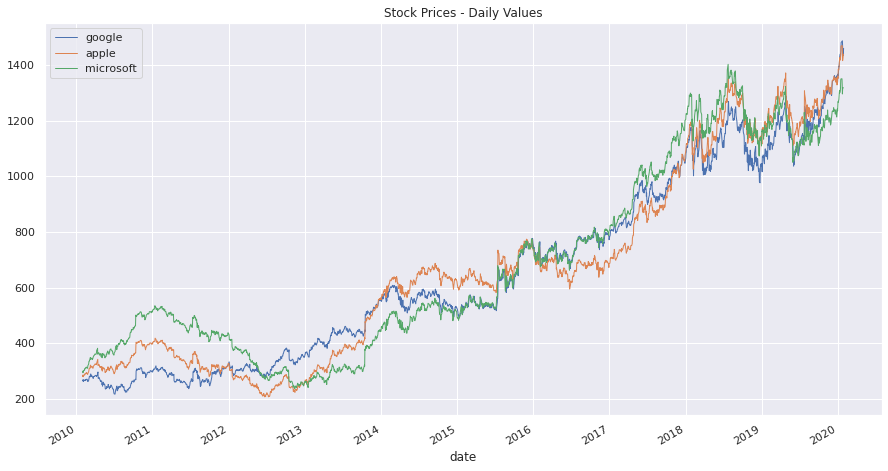

time: 417 ms (started: 2021-03-11 08:05:30 +00:00)


In [ ]:
sns.set(rc={'figure.figsize':(15, 8), "lines.linewidth": 1.0})
series.plot(title='Stock Prices - Daily Values')

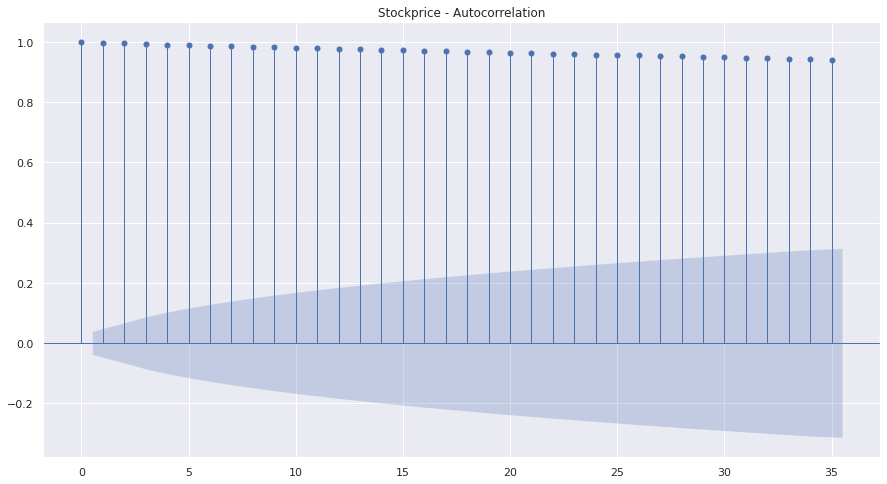

time: 322 ms (started: 2021-03-11 08:08:47 +00:00)


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series.google)
plt.title('Stockprice - Autocorrelation')
plt.show()

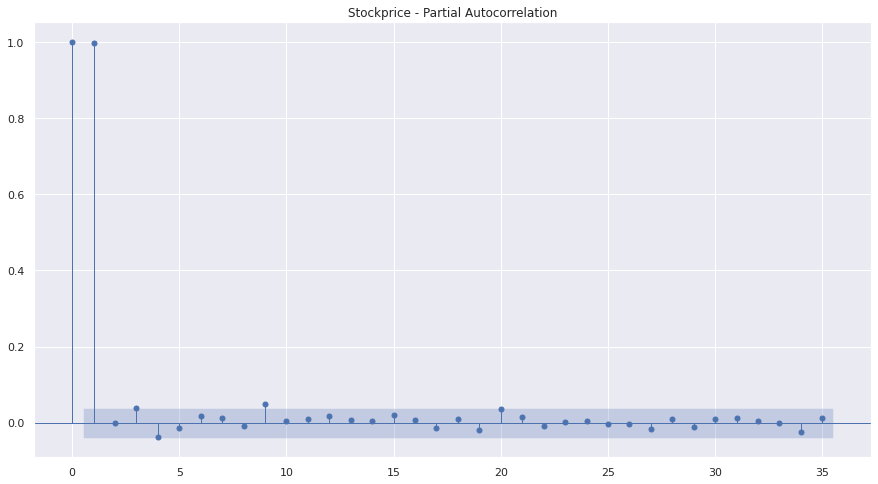

time: 274 ms (started: 2021-03-08 10:34:11 +00:00)


In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series.google)
plt.title('Stockprice - Partial Autocorrelation')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


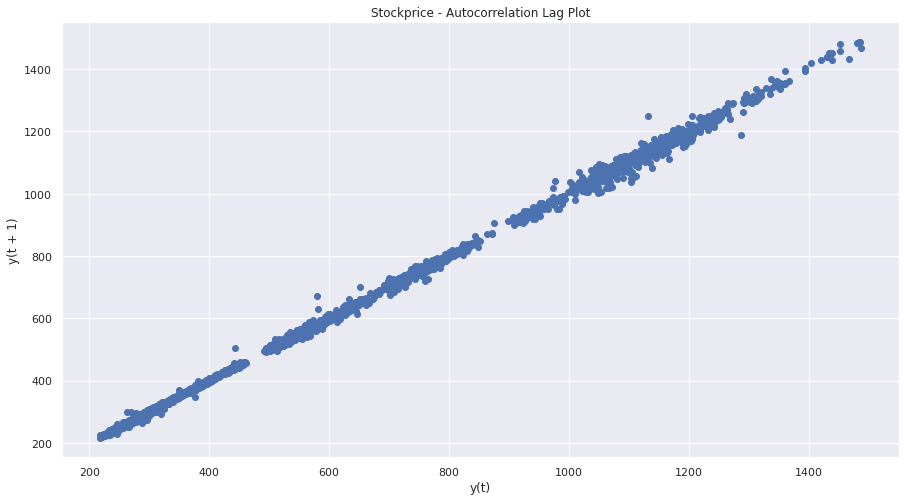

time: 225 ms (started: 2021-03-08 10:34:12 +00:00)


In [ ]:
from pandas.plotting import lag_plot
lag_plot(series.google)
plt.title('Stockprice - Autocorrelation Lag Plot')
plt.show()

In [ ]:
seasonal_plots = series.copy()
seasonal_plots

,google,apple,microsoft
date,,,
2010-02-01 00:00:00+00:00,265.51,280.42,299.63
2010-02-02 00:00:00+00:00,264.57,285.87,293.80
2010-02-03 00:00:00+00:00,269.40,279.49,297.20
2010-02-04 00:00:00+00:00,262.41,282.35,299.44
2010-02-05 00:00:00+00:00,264.65,284.06,302.08
...,...,...,...
2020-01-23 00:00:00+00:00,1486.65,1448.56,1295.50
2020-01-24 00:00:00+00:00,1466.71,1415.14,1313.33
2020-01-27 00:00:00+00:00,1433.90,1433.18,1318.58


time: 12.9 ms (started: 2021-03-08 10:34:13 +00:00)


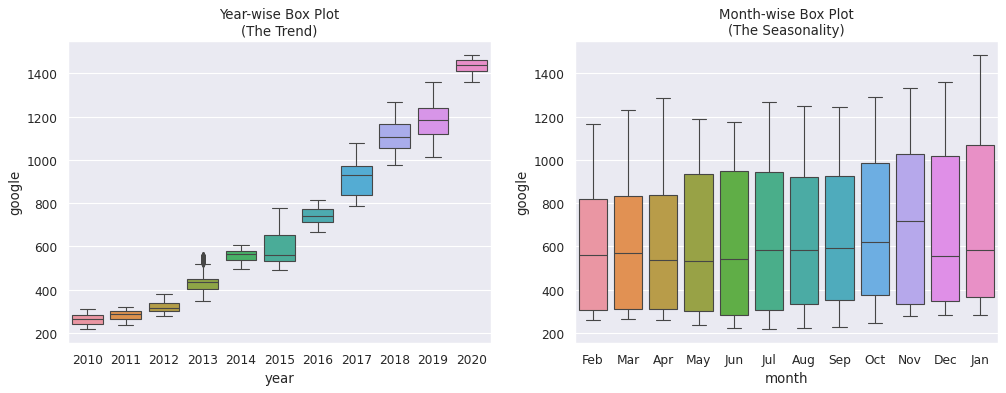

time: 1.03 s (started: 2021-03-11 08:09:00 +00:00)


In [ ]:
# Trend and Seasonality Test
seasonal_plots = series.copy()
seasonal_plots = seasonal_plots.drop(columns=['microsoft', 'apple'])
seasonal_plots.reset_index(inplace=True)

# Prepare data
seasonal_plots['year'] = [d.year for d in seasonal_plots.date]
seasonal_plots['month'] = [d.strftime('%b') for d in seasonal_plots.date]
years = seasonal_plots['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(15,5), dpi= 80)
sns.boxplot(x='year', y='google', data=seasonal_plots, ax=axes[0])
sns.boxplot(x='month', y='google', data=seasonal_plots.loc[~seasonal_plots.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=12); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=12)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


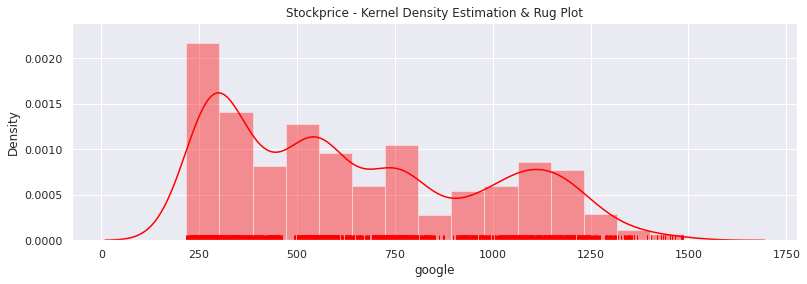

time: 385 ms (started: 2021-03-08 10:34:16 +00:00)


In [ ]:
sns.set(rc={'figure.figsize':(13, 4)})
sns.distplot((series.google), hist=True, rug=True, color ='red').set_title('Stockprice - Kernel Density Estimation & Rug Plot')
plt.show()

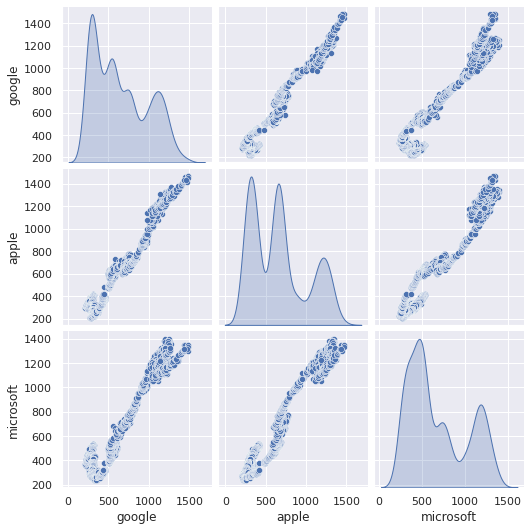

time: 1.57 s (started: 2021-03-08 10:34:18 +00:00)


In [ ]:
sns.set(rc={'figure.figsize':(13, 4)})
sns.pairplot(series, diag_kind='kde')

In [ ]:
grangercausality = series.copy()
grangercausality = grangercausality.drop(columns=['microsoft'])
grangercausality = grangercausality.diff()
grangercausality = grangercausality.dropna()
grangercausality

In [ ]:
# Granger Causality
# Null hypothesis: x2 does NOT Granger cause x1
# Reject null hypothesis if the p-values are below 0.05
import statsmodels.api as sm
import statsmodels.tsa.stattools

statsmodels.tsa.stattools.grangercausalitytests(grangercausality, maxlag = 5, addconst=True, verbose=True)

In [ ]:
sns.set(rc={'figure.figsize':(17, 8), "lines.linewidth": 1.0})
# get delta between time series
grangercausality['delta'] = (grangercausality.google) - (grangercausality.apple)
# visualize
grangercausality.delta.plot(title='Stock Prices - Daily Values')

In [ ]:
sns.set(rc={'figure.figsize':(17, 8), "lines.linewidth": 1.0})
# normalize series
grangercausality = grangercausality.apply(lambda x: x/x.cummax(), axis=0)
# visualize
grangercausality.delta.plot(title='Stock Prices - Daily Values')

**What is the time span? (until when do we have data?)**

In [ ]:
series.tail()

,google,apple,microsoft
date,,,
2020-01-23,1486.650024,1448.563926,1295.499336
2020-01-24,1466.709961,1415.138255,1313.333003
2020-01-27,1433.900024,1433.183293,1318.579432
2020-01-28,1452.560059,1438.639002,NaN
2020-01-29,1458.630005,NaN,NaN


**Are there any missing data?**

In [ ]:
series.apply(lambda x: sum(x.isnull()),axis=0) 

google       0
apple        1
microsoft    2
dtype: int64

time: 7.58 ms (started: 2021-03-11 08:09:10 +00:00)


**Drop NaN values**

In [ ]:
series = series.dropna()
series.tail()

,google,apple,microsoft
date,,,
2020-01-21,1484.400024,1469.037495,1349.910513
2020-01-22,1485.949951,1469.120434,1329.138464
2020-01-23,1486.650024,1448.563926,1295.499336
2020-01-24,1466.709961,1415.138255,1313.333003
2020-01-27,1433.900024,1433.183293,1318.579432


time: 13.2 ms (started: 2021-03-11 08:09:12 +00:00)


**Write cleaned time series as table called 'series' to bigquery**

In [ ]:
series = series.reset_index()
project_id = !gcloud config get-value project
series.to_gbq('banking.series', project_id=project_id[0])

1it [00:06,  6.15s/it]

time: 7.56 s (started: 2021-03-11 08:09:13 +00:00)


## **Regression (Forecasting) in BigQuery**

**Train BigQuery**

In [ ]:
%%bigquery
CREATE MODEL `lunar-demo.banking.arima`
 OPTIONS(MODEL_TYPE='ARIMA',
         time_series_timestamp_col='date',
         time_series_data_col='google') AS
SELECT
  date,
  google
FROM
  `banking.series`

""


time: 1min 32s (started: 2021-03-11 08:10:09 +00:00)


In [ ]:
%%bigquery
SELECT * 
FROM ML.ARIMA_COEFFICIENTS(MODEL banking.arima)

,ar_coefficients,ma_coefficients,intercept_or_drift
0,"[-0.3631838810303424, -0.6480094071529039, 0.1...","[0.5297251029398097, 0.9159993018852919]",0.298336


time: 2.47 s (started: 2021-03-11 08:12:23 +00:00)


In [ ]:
%%bigquery
SELECT * 
FROM ML.EVALUATE(MODEL banking.arima)

,non_seasonal_p,non_seasonal_d,non_seasonal_q,has_drift,log_likelihood,AIC,variance,seasonal_periods
0,3,1,2,True,-11735.069371,23484.138742,36.502184,"[WEEKLY, YEARLY]"
1,3,1,2,False,-11738.278048,23488.556095,36.566449,"[WEEKLY, YEARLY]"
2,4,1,1,True,-11831.027466,23676.054931,38.481354,"[WEEKLY, YEARLY]"
3,4,1,0,True,-11852.466527,23716.933054,38.937325,"[WEEKLY, YEARLY]"
4,5,1,0,True,-11852.464640,23718.929279,38.937285,"[WEEKLY, YEARLY]"
5,4,1,0,False,-11855.930338,23721.860676,39.011350,"[WEEKLY, YEARLY]"
6,4,1,1,False,-11855.927659,23723.855317,39.011292,"[WEEKLY, YEARLY]"
7,5,1,0,False,-11855.928654,23723.857308,39.011314,"[WEEKLY, YEARLY]"
8,0,1,3,True,-11857.058855,23724.117711,39.035650,"[WEEKLY, YEARLY]"
9,3,1,1,True,-11856.182812,23724.365624,39.016856,"[WEEKLY, YEARLY]"


time: 2.33 s (started: 2021-03-11 08:12:26 +00:00)


In [ ]:
%%bigquery
SELECT * 
FROM ML.TRAINING_INFO(MODEL banking.arima)

,training_run,iteration,duration_ms
0,0,0,81865


time: 2.14 s (started: 2021-03-11 08:12:33 +00:00)


## **Classification in BigQuery**

In [ ]:
series.head()

,date,google,apple,microsoft
0,2010-02-01,265.514771,280.416718,299.634420
1,2010-02-02,264.568329,285.866858,293.798048
2,2010-02-03,269.400208,279.490699,297.201112
3,2010-02-04,262.406433,282.354225,299.442578
4,2010-02-05,264.653015,284.056413,302.076580


time: 10.7 ms (started: 2021-03-11 08:12:35 +00:00)


In [ ]:
classification = series.copy()
classification['delta'] = classification.google.diff()
classification = classification.dropna()
classification.head()

,date,google,apple,microsoft,delta
1,2010-02-02,264.568329,285.866858,293.798048,-0.946442
2,2010-02-03,269.400208,279.490699,297.201112,4.831879
3,2010-02-04,262.406433,282.354225,299.442578,-6.993775
4,2010-02-05,264.653015,284.056413,302.076580,2.246582
5,2010-02-08,265.738953,286.151405,302.238798,1.085938


time: 17.4 ms


In [ ]:
classification['classifier'] = classification['delta']
classification['classifier'].values[classification['classifier'] < 0] = 0
classification['classifier'].values[classification['classifier'] > 0] = 1
classification.head()

,date,google,apple,microsoft,delta,classifier
1,2010-02-02,264.568329,285.866858,293.798048,-0.946442,0.0
2,2010-02-03,269.400208,279.490699,297.201112,4.831879,1.0
3,2010-02-04,262.406433,282.354225,299.442578,-6.993775,0.0
4,2010-02-05,264.653015,284.056413,302.076580,2.246582,1.0
5,2010-02-08,265.738953,286.151405,302.238798,1.085938,1.0


time: 15.7 ms


In [ ]:
classification.classifier.unique()

array([0., 1.])

time: 3.36 ms


In [ ]:
# Fun Fact: How many times the value of the series went up?
"In %s%% of all values are 1 (value going up)" % np.int_(len(classification.loc[classification.classifier > 0]) / len((classification.classifier)) * 100)

'In 52% of all values are 1 (value going up)'

time: 6.85 ms


**Write table to BigQuery as table called 'classification'**

In [ ]:
project_id = !gcloud config get-value project
classification.to_gbq('banking.classification', project_id=project_id[0])

1it [00:03,  3.21s/it]

time: 4.24 s


**Train Model (Classification)**

In [ ]:
%%bigquery
CREATE OR REPLACE MODEL
  `banking.log_reg`
OPTIONS
  ( model_type='LOGISTIC_REG',
    auto_class_weights=TRUE,
    input_label_cols=['classifier']
  ) AS
SELECT
  *
FROM
  `banking.classification`

""


time: 1min 6s


In [ ]:
%%bigquery
SELECT * 
FROM ML.TRAINING_INFO(MODEL banking.log_reg)

,training_run,iteration,loss,eval_loss,learning_rate,duration_ms
0,0,11,0.294566,0.326588,3.2,2964
1,0,10,0.305239,0.326822,3.2,2843
2,0,9,0.317393,0.342256,1.6,2760
3,0,8,0.326039,0.349771,0.8,3008
4,0,7,0.330012,0.358822,1.6,4421
5,0,6,0.342627,0.363844,1.6,2571
6,0,5,0.349288,0.376734,6.4,3131
7,0,4,0.427495,0.450884,3.2,2966
8,0,3,0.506521,0.525104,1.6,3610
9,0,2,0.579075,0.590969,0.8,3082


time: 1.18 s


In [ ]:
%%bigquery
SELECT * 
FROM ML.EVALUATE(MODEL banking.log_reg)

,precision,recall,accuracy,f1_score,log_loss,roc_auc
0,0.828179,0.967871,0.881874,0.892593,0.326588,0.978576


time: 834 ms


In [ ]:
%%bigquery
SELECT * 
FROM ML.CONFUSION_MATRIX(MODEL banking.log_reg)

,expected_label,_0,_1
0,0,192,50
1,1,8,241


time: 974 ms


In [ ]:
%%bigquery
SELECT * 
FROM ML.ROC_CURVE(MODEL banking.log_reg)

,threshold,recall,false_positive_rate,true_positives,false_positives,true_negatives,false_negatives
0,9.999999e-01,0.004016,0.000000,1,0,242,248
1,9.998490e-01,0.020080,0.000000,5,0,242,244
2,9.971835e-01,0.040161,0.000000,10,0,242,239
3,9.931476e-01,0.060241,0.000000,15,0,242,234
4,9.901593e-01,0.080321,0.000000,20,0,242,229
...,...,...,...,...,...,...,...
96,9.273249e-03,1.000000,0.921488,249,223,19,0
97,4.885302e-03,1.000000,0.942149,249,228,14,0
98,7.403874e-04,1.000000,0.962810,249,233,9,0
99,3.446860e-04,1.000000,0.983471,249,238,4,0


time: 699 ms


## **Regression in AutoML (Tables) Forecasting**

In [ ]:
series.head()

,date,google,apple,microsoft
0,2010-02-01,265.514771,280.416718,299.634420
1,2010-02-02,264.568329,285.866858,293.798048
2,2010-02-03,269.400208,279.490699,297.201112
3,2010-02-04,262.406433,282.354225,299.442578
4,2010-02-05,264.653015,284.056413,302.076580


time: 12.6 ms


**Add unique identifier for AutoML Forecasting**

In [ ]:
automl = series.copy()
automl['unique_id'] = '42'
automl.head()

,date,google,apple,microsoft,unique_id
0,2010-02-01,265.514771,280.416718,299.634420,42
1,2010-02-02,264.568329,285.866858,293.798048,42
2,2010-02-03,269.400208,279.490699,297.201112,42
3,2010-02-04,262.406433,282.354225,299.442578,42
4,2010-02-05,264.653015,284.056413,302.076580,42


time: 15.4 ms


**How many entries are there? (minimum 2000 for AutoML Forecasting)**

In [ ]:
automl.count()

date         2514
google       2514
apple        2514
microsoft    2514
unique_id    2514
dtype: int64

time: 8.44 ms


**Missing Data?**

In [ ]:
automl.apply(lambda x: sum(x.isnull()),axis=0) 

date         0
google       0
apple        0
microsoft    0
unique_id    0
dtype: int64

time: 24.1 ms


**Write table as table called 'automl' in Bigquery**

In [ ]:
project_id = !gcloud config get-value project
automl.to_gbq('banking.automl', project_id=project_id[0])

1it [00:03,  3.40s/it]

time: 4.44 s


# **Financial Time Series Forecasting**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

!pip install --quiet ipython-autotime pandas_gbq
%load_ext autotime

time: 769 µs (started: 2021-09-01 19:15:29 +00:00)


## **Load Data**

In [ ]:
# Insolvenzverfahren

_FINANCE_PROJECT_NAME = u"lunar-demo"

def run_finance_query(query, index_col="year"):
  return pd.read_gbq(
    query,
    project_id=_FINANCE_PROJECT_NAME,
    index_col=index_col,
    dialect="standard").sort_index()

google_raw = run_finance_query(
    "SELECT * FROM `lunar-demo.repo.google_raw` order by year asc")

google_raw.head()

,month,day,open,close,high,low,volume
year,,,,,,,
2004,12,30,70.55,70.75,70.95,70.40,1.21
2004,12,29,70.50,70.90,71.04,70.35,2.96
2004,12,28,70.40,70.49,70.80,70.40,1.37
2004,12,27,69.45,70.50,70.95,69.43,1.57
2004,12,23,69.45,69.65,69.65,68.85,1.59


time: 1.67 s (started: 2021-09-01 20:14:01 +00:00)


### **Preprocess Time Series**

**Create proper datetime**

In [ ]:
# Copy table (recopy raw table, um bei fehlern die originaltabelle nicht immer neu herunterladen zu muessen)
google = google_raw.copy()

# Reset index
google = google.reset_index()

# Create date time
google['date'] = pd.to_datetime(google[['year', 'month', 'day']], utc=True)

# Set index
google = google.set_index('date')

# Drop unnecessary columns
google = google.drop(['year', 'month', 'day'], axis=1)

# Sort date
google = google.sort_index() #inplace=True, ascending=True)

google.head()

,open,close,high,low,volume
date,,,,,
2004-08-30 00:00:00+00:00,43.70,42.70,43.85,42.60,2.12
2004-08-31 00:00:00+00:00,42.30,42.25,42.55,42.03,3.79
2004-09-01 00:00:00+00:00,42.10,41.30,42.30,41.15,3.59
2004-09-02 00:00:00+00:00,41.00,41.28,41.35,40.60,5.58
2004-09-03 00:00:00+00:00,41.08,41.50,41.85,41.08,1.70


time: 27 ms (started: 2021-09-01 20:18:49 +00:00)


**Make statistical analysis**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


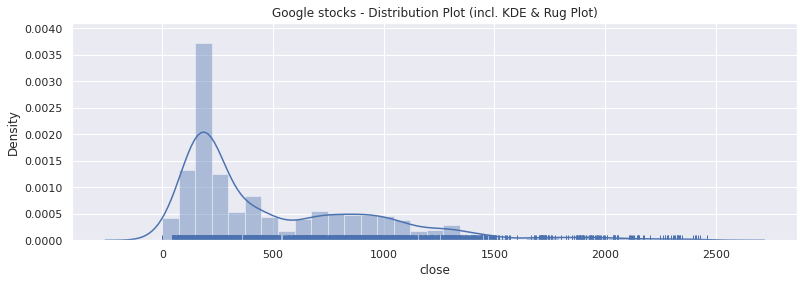

time: 319 ms (started: 2021-09-01 20:18:52 +00:00)


In [ ]:
sns.set(rc={'figure.figsize':(13, 4)})
sns.distplot((google.close), hist=True, rug=True).set_title('Google stocks - Distribution Plot (incl. KDE & Rug Plot)')
plt.show()

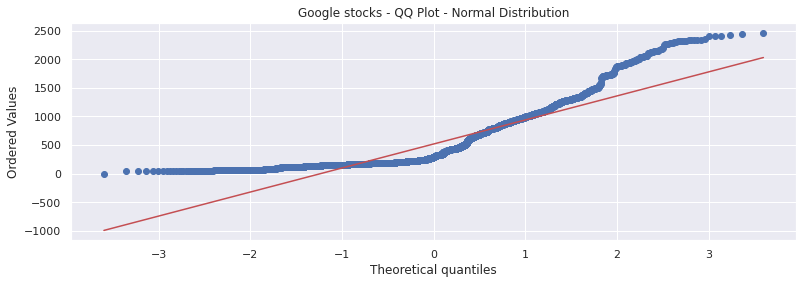

time: 209 ms (started: 2021-09-01 20:19:42 +00:00)


In [ ]:
import scipy
from scipy import stats
stats.probplot(google.close, dist="norm", plot=plt)
plt.title('Google stocks - QQ Plot - Normal Distribution')
plt.show()

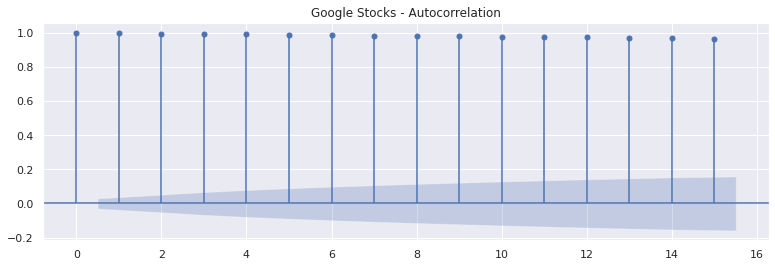

time: 443 ms (started: 2021-09-01 20:20:17 +00:00)


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(google.close.squeeze(), lags=15)
plt.title('Google Stocks - Autocorrelation')
plt.show()

**Add column for differenced and normalized values**

In [ ]:
# Add differences
google = google.diff(axis=0)

# Normalize
google = google.apply(lambda x: x/x.max(), axis=0)

# Remove nan
google = google.dropna()

# Turn into ing with no decimals
google = google.round(decimals=4)

# Display preprocessed & cleaned table
google.head()

,open,close,high,low,volume
date,,,,,
2004-09-01 00:00:00+00:00,0.0051,0.0,0.005,0.0,-0.0000
2004-09-02 00:00:00+00:00,0.0000,0.0,0.000,0.0,0.0000
2004-09-03 00:00:00+00:00,0.0000,0.0,0.000,0.0,-0.0000
2004-09-06 00:00:00+00:00,0.0000,0.0,-0.000,0.0,0.1282
2004-09-07 00:00:00+00:00,0.0000,0.0,0.000,-0.0,-0.2564


time: 21.9 ms (started: 2021-09-01 20:14:24 +00:00)


**Display table**

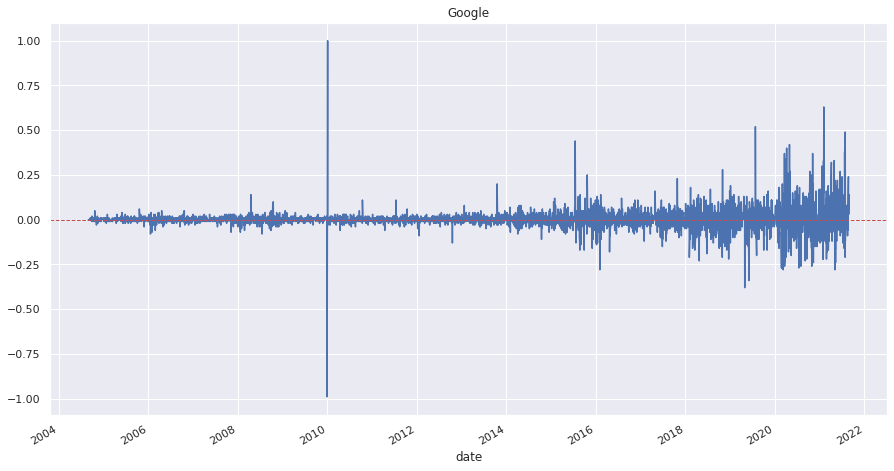

time: 355 ms (started: 2021-09-01 20:14:18 +00:00)


In [ ]:
# Display Data
sns.set(rc={'figure.figsize':(15, 8)})
google.close.plot(title='Google')
plt.axhline(0, linewidth=1, color='r', ls='--')

**Zoom in on timeframes**

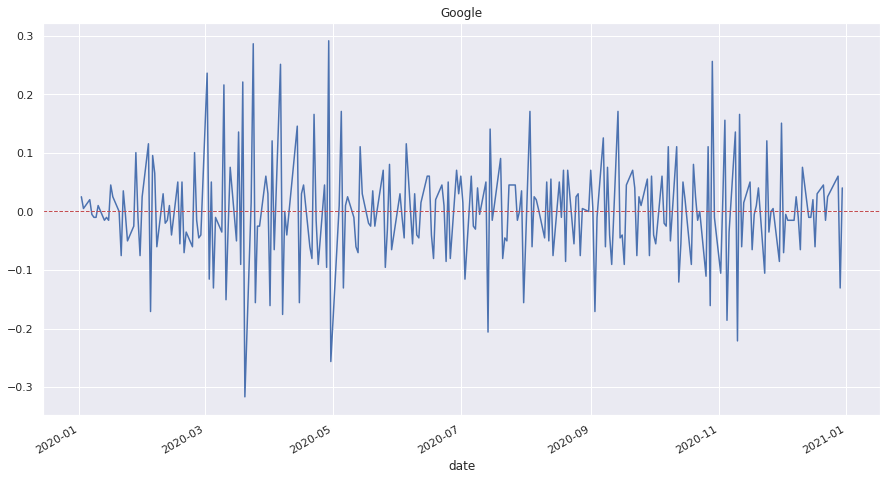

time: 339 ms (started: 2021-09-01 20:14:40 +00:00)


In [ ]:
# Display Data during peak
resample = google.close['2020-01-01':'2021-01-01']
sns.set(rc={'figure.figsize':(15, 8)})
resample.plot(title='Google')
plt.axhline(0, linewidth=1, color='r', ls='--')

**Save preprocessed table in Bigquery**

In [ ]:
# Send copy as new table to BigQuery
google = google.reset_index()
project_id = !gcloud config get-value project
google.to_gbq('repo.google', project_id=project_id[0], if_exists='replace')

1it [00:05,  5.67s/it]

time: 6.97 s (started: 2021-09-01 20:15:08 +00:00)


### **Train Autoregressive Model (Arima)**

*Trainieren eines Arima-Models auf Basis der taglichen Differenzen der Insolvenzen in Schleswig Holstein. Dokumentation: [bigqueryml-syntax-create](https://cloud.google.com/bigquery-ml/docs/reference/standard-sql/bigqueryml-syntax-create) bzw. [bigqueryml-syntax-create-time-series](https://cloud.google.com/bigquery-ml/docs/reference/standard-sql/bigqueryml-syntax-create-time-series)*

In [ ]:
%%bigquery
CREATE OR REPLACE MODEL `lunar-demo.repo.arima`
 OPTIONS(MODEL_TYPE='ARIMA',
         time_series_timestamp_col='date',
         time_series_data_col='close') AS
SELECT
  date,
  close
FROM
  `lunar-demo.repo.google`

""


time: 1min 29s (started: 2021-09-01 20:07:18 +00:00)


In [ ]:
%%bigquery
SELECT * 
FROM ML.ARIMA_COEFFICIENTS(MODEL repo.arima)

,ar_coefficients,ma_coefficients,intercept_or_drift
0,[],"[-0.13469456139578206, 0.0025103384351321018, ...",-0.000211


time: 1.77 s (started: 2021-09-01 20:08:57 +00:00)


In [ ]:
%%bigquery
SELECT * 
FROM ML.EVALUATE(MODEL repo.arima)

,non_seasonal_p,non_seasonal_d,non_seasonal_q,has_drift,log_likelihood,AIC,variance,seasonal_periods
0,0,0,5,False,17675.030079,-35336.060157,0.000196,[NO_SEASONALITY]
1,3,0,2,False,17674.665451,-35335.330903,0.000196,[NO_SEASONALITY]
2,5,0,0,False,17674.505489,-35335.010978,0.000196,[NO_SEASONALITY]
3,4,0,1,False,17672.402367,-35330.804733,0.000196,[NO_SEASONALITY]
4,4,0,0,False,17670.752592,-35329.505185,0.000196,[NO_SEASONALITY]
5,2,0,3,False,17671.545614,-35329.091228,0.000196,[NO_SEASONALITY]
6,1,0,4,False,17671.216482,-35328.432965,0.000196,[NO_SEASONALITY]
7,3,0,1,False,17669.508778,-35327.017555,0.000196,[NO_SEASONALITY]
8,1,0,3,False,17668.257745,-35324.515489,0.000197,[NO_SEASONALITY]
9,0,0,4,False,17667.188278,-35322.376555,0.000197,[NO_SEASONALITY]


time: 2.93 s (started: 2021-09-01 20:09:05 +00:00)


**Make Forecasts** 

*Dokumentation: https://cloud.google.com/bigquery-ml/docs/reference/standard-sql/bigqueryml-syntax-forecast*

In [ ]:
arima_prediction = pd.io.gbq.read_gbq('''
SELECT * 
FROM ML.FORECAST(MODEL repo.arima,
              STRUCT(7 AS horizon, 0.8 AS confidence_level));
''')

arima_prediction = arima_prediction.set_index('forecast_timestamp')

arima_prediction.head()

,forecast_value,standard_error,confidence_level,prediction_interval_lower_bound,prediction_interval_upper_bound,confidence_interval_lower_bound,confidence_interval_upper_bound
forecast_timestamp,,,,,,,
2021-08-31 00:00:00+00:00,0.003316,0.014005,0.8,-0.014641,0.021274,-0.014641,0.021274
2021-09-01 00:00:00+00:00,-0.000430,0.014131,0.8,-0.018550,0.017690,-0.018550,0.017690
2021-09-02 00:00:00+00:00,-0.000480,0.014131,0.8,-0.018600,0.017640,-0.018600,0.017640
2021-09-03 00:00:00+00:00,-0.000339,0.014139,0.8,-0.018469,0.017791,-0.018469,0.017791
2021-09-04 00:00:00+00:00,-0.000417,0.014162,0.8,-0.018577,0.017742,-0.018577,0.017742


time: 1.27 s (started: 2021-09-01 20:09:12 +00:00)


**Visualisierung der Forecasts**

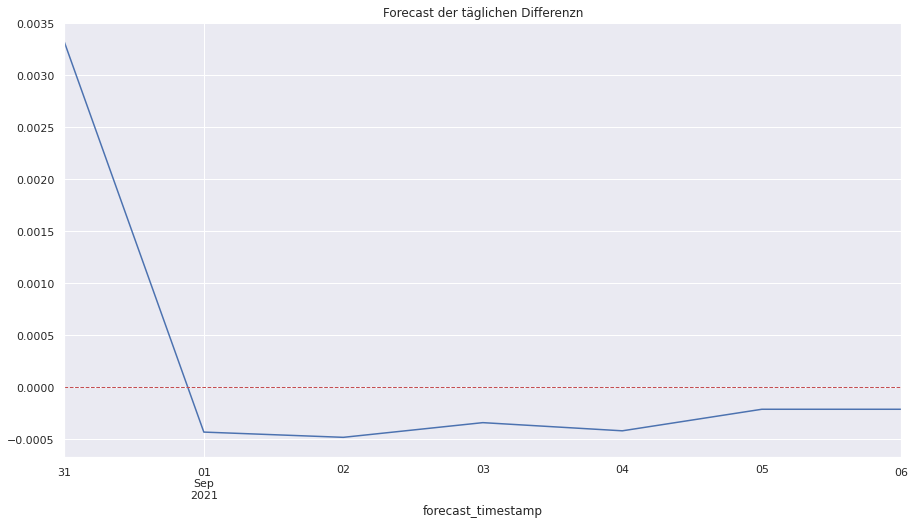

time: 284 ms (started: 2021-09-01 20:09:34 +00:00)


In [ ]:
# Display predictions
sns.set(rc={'figure.figsize':(15, 8)})
arima_prediction.forecast_value.plot(title='Forecast der täglichen Differenzn')
plt.axhline(0, linewidth=1, color='r', ls='--')

In [ ]:
# Send forecasts as new table to BigQuery
arima_prediction = arima_prediction.reset_index()
project_id = !gcloud config get-value project
arima_prediction.to_gbq('repo.arima_prediction', project_id=project_id[0], if_exists='replace')

1it [00:05,  5.10s/it]

time: 6.4 s (started: 2021-09-01 20:09:57 +00:00)


# **IIoT Telemetry - Data Analysis, Preparation & Model Training**

**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

*Following code is not necessary if the notebook runs as Jupyterlab on GCP Managed Notebooks*

In [ ]:
# from google.colab import auth
# auth.authenticate_user()
# print('Authenticated')

## **Load Data**


**[Option 1] Load Data from Google Cloud Storage**

In [ ]:
# !gsutil cp gs://manufacturing-demo/telemetryfeat.csv .

Copying gs://manufacturing-demo/telemetryfeat.csv...
- [1 files][ 47.5 MiB/ 47.5 MiB]                                                
Operation completed over 1 objects/47.5 MiB.                                     


**[Option 2] Load Data from Github**

In [ ]:
# url = 'https://raw.githubusercontent.com/......csv'
# series_raw = pd.read_csv(url)
# series_raw.head()

**[Option 3] Load Data from BigQuery**

In [ ]:
_IOT_PROJECT_NAME = u"lunar-demo"

def run_iot_query(query, index_col="datetime"):
  return pd.read_gbq(
    query,
    project_id=_IOT_PROJECT_NAME,
    index_col=index_col,
    dialect="standard").sort_index()

In [ ]:
# 'telemetryfeat'
telemetryfeat_raw = run_iot_query(
    "SELECT * FROM `lunar-demo.manufacturing.telemetryfeat` order by datetime asc")

Downloading: 100%|██████████| 291300/291300 [00:34<00:00, 8525.98rows/s]


In [ ]:
# Upload total 'raw' table data to BigQuery
# !pip install --quiet ipython-autotime pandas_gbq
# %load_ext autotime
# project_id = !gcloud config get-value project
# telemetryfeat.to_gbq('manufacturing.telemetryfeat2', project_id=project_id[0])

## **Display Raw Data**

**Copy and display 'raw' data**

In [ ]:
telemetryfeat = telemetryfeat_raw
telemetryfeat.head(15)

,machineID,voltmean,rotatemean,pressuremean,vibrationmean,voltsd,rotatesd,pressuresd,vibrationsd
datetime,,,,,,,,,
2015-01-02 05:00:00+00:00,1,169.733809,445.179865,96.797113,40.385160,11.233120,48.717395,10.079880,5.853209
2015-01-02 05:00:00+00:00,2,172.096089,442.804046,97.369279,41.970373,11.358840,41.038841,11.003220,4.569906
2015-01-02 05:00:00+00:00,3,170.066825,460.956803,101.395264,37.989643,12.133703,50.054464,10.831107,5.845904
2015-01-02 05:00:00+00:00,4,170.116871,440.333823,98.378607,42.106068,16.607902,49.172579,8.282528,4.833216
2015-01-02 05:00:00+00:00,5,175.674631,460.621226,97.928488,38.591031,14.915482,60.620670,10.824448,4.355144
2015-01-02 05:00:00+00:00,6,166.444305,463.516403,121.719376,38.635407,14.444338,52.712198,18.968190,5.609616
2015-01-02 05:00:00+00:00,7,173.004557,463.190750,102.947943,40.474100,16.414778,53.033936,6.719689,5.471629
2015-01-02 05:00:00+00:00,8,170.045926,457.909332,102.229773,39.978532,18.773000,56.230991,8.849344,6.263199
2015-01-02 05:00:00+00:00,9,179.657731,433.882827,99.757316,39.725985,20.075297,54.019108,9.184115,4.495655


We can filter data in two dimension: either all sensors for one machine, or data from one sensor on all machines. We will do both.

**Option 1: Choose one Sensor over all Machines**

('Unmelt' table for one feature only and list per Machine ID)

In [ ]:
voltmean = telemetryfeat.reset_index()
voltmean = voltmean[['datetime', 'machineID', 'voltmean']]
voltmean = pd.pivot_table(voltmean, values='voltmean', index=['datetime'], columns=['machineID'])
voltmean = voltmean.dropna(axis='columns')
# Adding a prefix, since we cannot work with values starting with numbers in columns
voltmean = voltmean.add_prefix('m_')
voltmean

machineID,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10,...,m_91,m_92,m_93,m_94,m_95,m_96,m_97,m_98,m_99,m_100
datetime,,,,,,,,,,,,,,,,,,,,,
2015-01-02 05:00:00+00:00,169.733809,172.096089,170.066825,170.116871,175.674631,166.444305,173.004557,170.045926,179.657731,169.200172,...,172.677564,170.560444,170.496339,165.811714,176.024427,174.305445,168.734298,168.697828,169.486659,170.666511
2015-01-02 08:00:00+00:00,170.525721,171.510408,167.193146,170.145327,174.725997,169.709845,173.815784,171.351848,177.537748,167.467301,...,173.245011,172.299821,171.713525,164.558632,175.915434,173.241995,170.815997,168.385422,170.506146,171.483121
2015-01-02 11:00:00+00:00,170.049722,170.840565,169.120617,168.985282,175.639031,169.141877,176.160444,170.441943,177.052348,167.100570,...,174.782505,169.155851,171.716567,163.036201,176.068521,172.957382,171.573747,169.312676,171.650582,171.841317
2015-01-02 14:00:00+00:00,170.341974,170.736634,170.667376,167.216339,174.371977,171.511405,175.918266,171.948016,175.673448,165.237155,...,174.624991,168.629099,173.169107,164.111694,173.884472,176.265383,170.503503,166.368306,170.513497,172.297964
2015-01-02 17:00:00+00:00,170.060643,169.596900,169.182447,169.106224,172.739565,172.086832,172.909641,171.217094,173.742675,164.453237,...,174.142999,168.597517,173.071985,166.142406,174.604635,174.889797,171.040214,165.636800,168.531441,170.167895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 17:00:00+00:00,171.349634,166.569083,171.111509,165.642642,172.957293,169.816262,169.478473,168.755389,167.470779,171.577454,...,170.149634,170.631841,169.466892,175.192990,182.025814,166.241646,175.867727,167.877142,173.232940,170.629076
2015-12-31 20:00:00+00:00,171.106776,166.899065,170.693967,166.787150,171.207999,171.112127,168.454482,170.036683,167.475402,170.817850,...,171.693158,171.362318,170.693073,174.986512,180.674445,165.127517,173.747255,166.294567,174.133704,168.690712
2015-12-31 23:00:00+00:00,168.463155,168.275282,172.179457,165.837692,170.342656,171.478221,166.080161,171.621181,164.433770,167.255451,...,167.886270,170.163492,172.034616,174.458304,179.271640,167.678923,172.083943,168.924428,172.421048,168.469994


**Option 2: Choose one Machine and show all Sensor Records on it**

In [ ]:
machine_1 = telemetryfeat[(telemetryfeat.machineID == 1)]
# Normally we can drop the machine ID column, but we will need it for AutoML Forecasting,so we keep it 
# machine_1 = machine_1.drop(columns=['machineID']).sort_index(ascending=True)
machine_1

,machineID,voltmean,rotatemean,pressuremean,vibrationmean,voltsd,rotatesd,pressuresd,vibrationsd
datetime,,,,,,,,,
2015-01-02 05:00:00+00:00,1,169.733809,445.179865,96.797113,40.385160,11.233120,48.717395,10.079880,5.853209
2015-01-02 08:00:00+00:00,1,170.525721,443.906847,97.667249,39.786670,12.591948,46.930282,9.406795,6.098173
2015-01-02 11:00:00+00:00,1,170.049722,446.461279,96.906162,40.016513,13.277336,42.836780,9.071472,5.481724
2015-01-02 14:00:00+00:00,1,170.341974,447.355315,96.229522,39.921963,13.817158,42.808633,8.256794,5.862312
2015-01-02 17:00:00+00:00,1,170.060643,452.163407,96.357441,39.990470,14.792869,42.525293,8.669605,5.907157
...,...,...,...,...,...,...,...,...,...
2015-12-31 17:00:00+00:00,1,171.349634,452.416132,99.748116,39.655997,14.236322,65.731722,8.891385,4.795727
2015-12-31 20:00:00+00:00,1,171.106776,448.747625,99.509456,39.416218,12.086360,66.209673,9.097349,5.535579
2015-12-31 23:00:00+00:00,1,168.463155,449.732664,98.636486,38.642038,12.447174,64.707424,10.294397,5.160023


## **Analyse Data**

**We have 8 sensor data from different machines per each time stamp. How many machines are there?**

In [ ]:
telemetryfeat.machineID.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [ ]:
telemetryfeat['machineID'].nunique()

100

There are records from 100 machines.

**What is the time span? (until when do we have data?)**

In [ ]:
telemetryfeat.tail()

,machineID,voltmean,rotatemean,pressuremean,vibrationmean,voltsd,rotatesd,pressuresd,vibrationsd
datetime,,,,,,,,,
2016-01-01 05:00:00+00:00,96,168.737340,448.451423,102.010456,40.591368,17.863243,44.241511,10.602169,4.791980
2016-01-01 05:00:00+00:00,97,174.066698,462.606664,95.378736,40.668871,10.645043,47.928761,10.701270,5.131409
2016-01-01 05:00:00+00:00,98,170.146868,444.604801,125.024957,40.661580,17.398373,50.000901,9.436988,4.244810
2016-01-01 05:00:00+00:00,99,168.689830,457.549855,100.864715,40.882592,15.854221,45.155521,7.063937,5.008058
2016-01-01 05:00:00+00:00,100,173.872030,455.376558,101.447889,40.261609,15.564393,61.308632,8.835047,6.171566


We have data from 2015-01-02 until 2016-01-01.

**Are there any missing data?**

In [ ]:
telemetryfeat.apply(lambda x: sum(x.isnull()),axis=0) 

machineID        0
voltmean         0
rotatemean       0
pressuremean     0
vibrationmean    0
voltsd           0
rotatesd         0
pressuresd       0
vibrationsd      0
dtype: int64

No missing data. Series is (atypically) very clean.

**How many records do we have?**

In [ ]:
telemetryfeat.describe()

,machineID,voltmean,rotatemean,pressuremean,vibrationmean,voltsd,rotatesd,pressuresd,vibrationsd
count,291300.00000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000
mean,50.50000,170.772380,446.613387,100.854549,40.384528,14.918992,49.947267,10.047051,5.001975
std,28.86612,4.716899,18.073481,4.733546,2.059801,2.260848,7.689803,1.712238,0.799431
min,1.00000,156.284729,267.008131,90.352636,35.253276,6.502826,19.839519,4.433238,2.107598
25%,25.75000,168.068540,441.572806,98.670051,39.357556,13.358201,44.667738,8.924565,4.461158
50%,50.50000,170.209615,449.198555,100.098070,40.070423,14.855999,49.614839,9.922168,4.958120
75%,75.25000,172.454059,456.369858,101.613625,40.832048,16.396254,54.802211,10.981186,5.484147
max,100.00000,220.569064,499.288786,152.660905,61.852838,27.914053,105.326445,28.867737,12.609035


We have 291,300 records for each feature. Given that we have 100 sensors this means we have 2,913 records per machine and sensor (feature). But let's extract the values from one sensor for all 100 machines to see that a bit more in detail:

**Do they values fluctuate a lot per machine, or are they similar?**

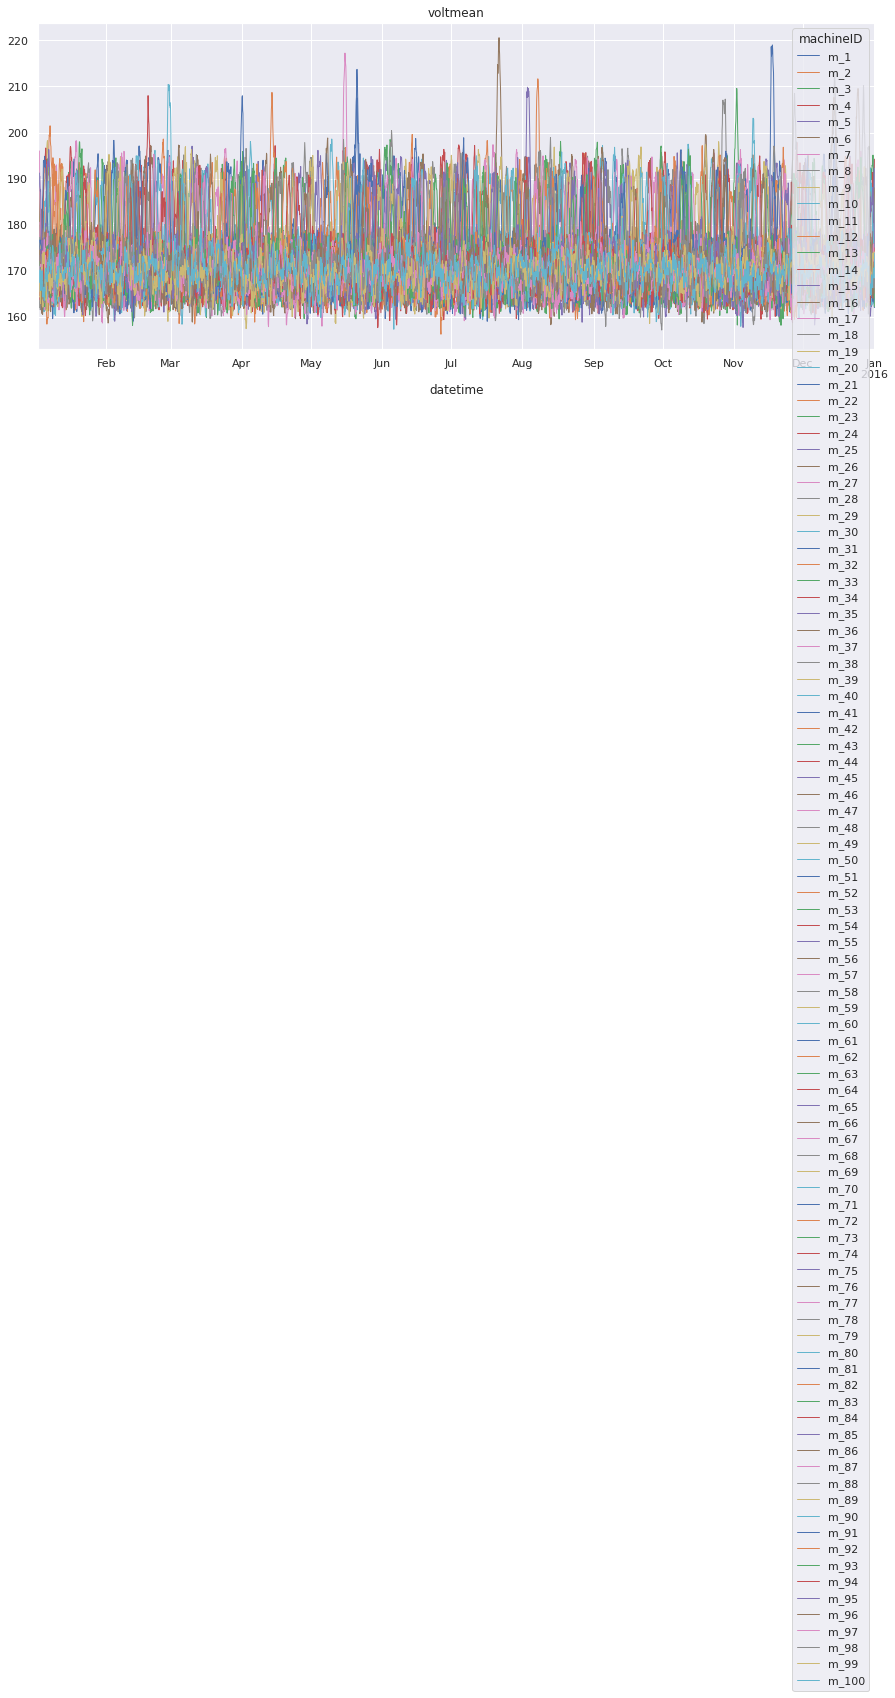

In [ ]:
sns.set(rc={'figure.figsize':(15, 6)})
voltmean.plot(linewidth=1.0,title='voltmean')

## **Analysis of Data from one Machine**

Let's have a look at rhe sensor records at a single machine (m_1 and m_100):

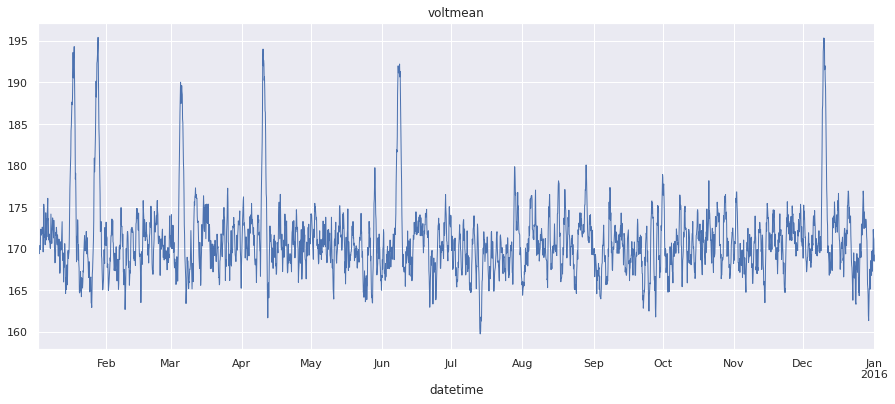

time: 959 ms


In [ ]:
sns.set(rc={'figure.figsize':(15, 6)})
voltmean.m_1.plot(linewidth=1.0,title='voltmean')

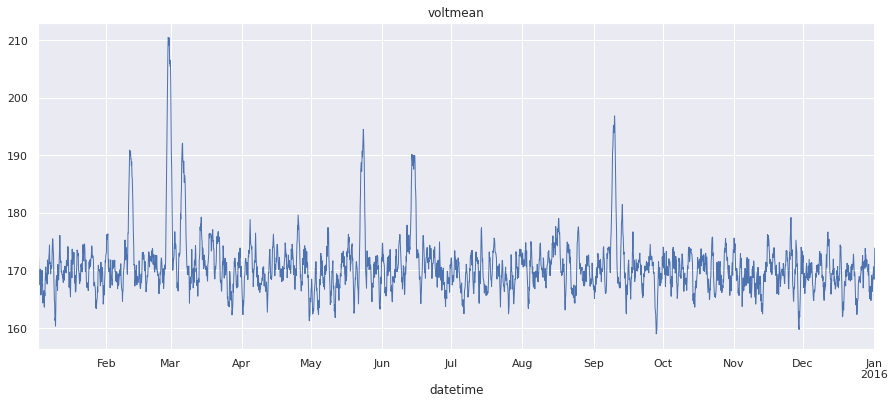

time: 922 ms


In [ ]:
sns.set(rc={'figure.figsize':(15, 6)})
voltmean.m_100.plot(linewidth=1.0,title='voltmean')

Sensor values fluctuate a lot looking at different machines. Might be worthful knowing why.
That brings us to the next question regarding data distribution

**What is the data distribution over all 100 machines for one feature?**

Distribution for the one feature over all 100 machines:

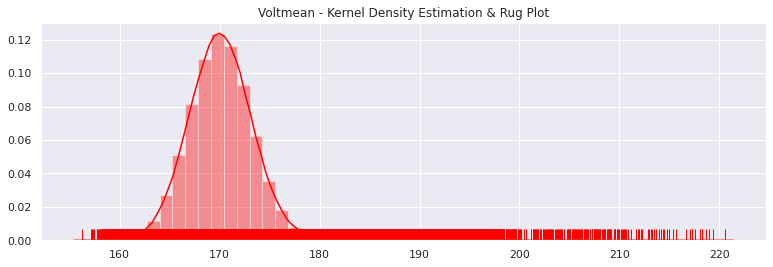

time: 3.09 s


In [ ]:
sns.set(rc={'figure.figsize':(13, 4)})
sns.distplot((voltmean), hist=True, rug=True, color ='red').set_title('Voltmean - Kernel Density Estimation & Rug Plot')
plt.show()

Distribution for the one feature for one machines (#1):

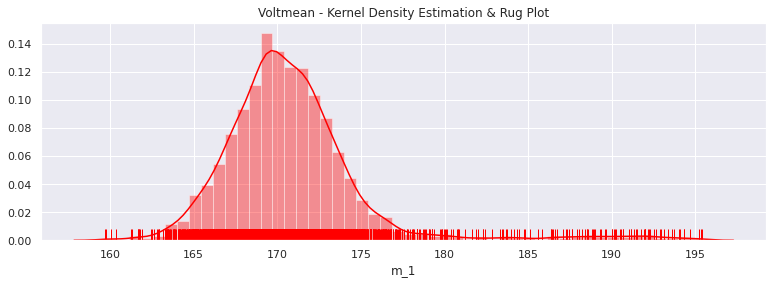

time: 413 ms


In [ ]:
sns.set(rc={'figure.figsize':(13, 4)})
sns.distplot((voltmean.m_1), hist=True, rug=True, color ='red').set_title('Voltmean - Kernel Density Estimation & Rug Plot')
plt.show()

In [ ]:
%%bigquery
SELECT * 
FROM ML.WEIGHTS(MODEL banking.log_reg)

,processed_input,weight,category_weights
0,date,-4.194779e-10,[]
1,_TS_DOM_date_,NaN,"[{'category': '20', 'weight': -0.0812045965873..."
2,_TS_DOW_date_,NaN,"[{'category': '6', 'weight': -0.06844739360330..."
3,_TS_MOY_date_,NaN,"[{'category': '4', 'weight': 0.122374306104662..."
4,_TS_HOD_date_,NaN,"[{'category': '0', 'weight': 0.044565726085293..."
5,_TS_MOH_date_,NaN,"[{'category': '0', 'weight': 0.044565726085293..."
6,_TS_WOY_date_,NaN,"[{'category': '38', 'weight': 0.34825093586735..."
7,_TS_YEAR_date_,NaN,"[{'category': '2010', 'weight': 0.134299786137..."
8,google,-1.320949e-06,[]
9,apple,-4.336357e-05,[]


time: 1.01 s


**Autocorrelation Plot for selected feature on one machine**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


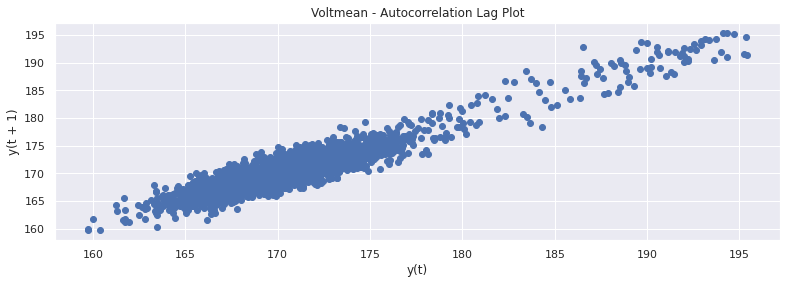

time: 292 ms


In [ ]:
from pandas.plotting import lag_plot
lag_plot(voltmean.m_1)
plt.title('Voltmean - Autocorrelation Lag Plot')
plt.show()

Typically for time series: the most recent time steps has a strong influence on the current value.

Let's have a look at previous time steps' influence on the current value:

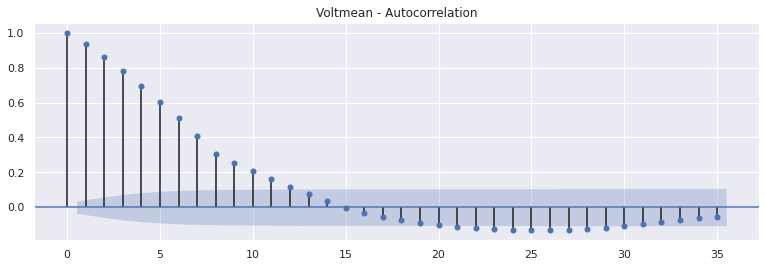

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(voltmean.m_1)
plt.title('Voltmean - Autocorrelation')
plt.show()

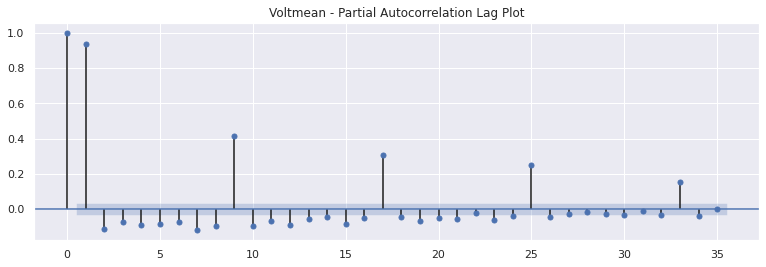

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(voltmean.m_1)
plt.title('Voltmean - Partial Autocorrelation Lag Plot')
plt.show()

There is an interesting pattern: every past 8 time steps (each 8 hours) have an influence on the current value. Domain knowledge might reveal the reason for this behavior, but 24h seems to reflect machine on/off cycles or similar.

**Visualize Sensor as Time Series Plot**

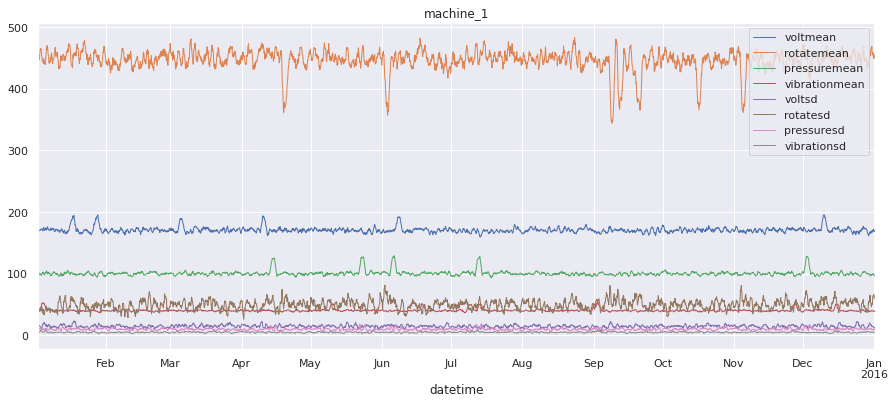

time: 1.18 s


In [ ]:
# Remove machineID column
df = machine_1.drop(columns=['machineID', 'classifier'])
# Display all sensor data for machine 1
sns.set(rc={'figure.figsize':(15, 6)})
df.plot(linewidth=1.0,title='machine_1')

## **Preprocess Data for Model Training**

**Add Columns for BigQuery Classification and AutoML Forecasting**

In [ ]:
# AutoML Forecasting requires a constant per table, but witrh this dataset it is not necessary
# machine_1['unique_id'] = '42'
# machine_1.head()

**Add a classification component and classifier (for example we want to predict 'voltmean')**

In [ ]:
machine_1['delta'] = machine_1.voltmean.diff()
machine_1 = machine_1.dropna()
machine_1['classifier'] = machine_1['delta']
machine_1 = machine_1.drop(columns=['delta'])
machine_1['classifier'].values[machine_1['classifier'] < 0] = 0
machine_1['classifier'].values[machine_1['classifier'] > 0] = 1
machine_1.head()

## **Load Data to BigQuery**

We will be working with data from one machine.

In [ ]:
# Reset index to properly save datetime data in BigQuery
machine_1 = machine_1.reset_index()

In [ ]:
# Allow connection to BigQuery
!pip install --quiet ipython-autotime pandas_gbq
%load_ext autotime

In [ ]:
# Upload filtered data to BigQuery
machine_1.to_gbq('manufacturing.machine_1', project_id=PROJECT)

## **Train & Evaluate Model**

## **Regression on BigQuery**

Let's create an Arima model for sensor 'voltmean' on machine 1

In [ ]:
%%bigquery
CREATE MODEL `lunar-demo.manufacturing.arima`
 OPTIONS(MODEL_TYPE='ARIMA',
         time_series_timestamp_col='datetime',
         time_series_data_col='voltmean') AS
SELECT
  datetime,
  voltmean
FROM
  `manufacturing.machine_1`

""


time: 1min


In [ ]:
%%bigquery
SELECT * 
FROM ML.ARIMA_COEFFICIENTS(MODEL manufacturing.arima)

,ar_coefficients,ma_coefficients,intercept_or_drift
0,[],"[0.05309046559396521, 0.022433609053060542, 0....",0.0


time: 845 ms


In [ ]:
%%bigquery
SELECT * 
FROM ML.EVALUATE(MODEL manufacturing.arima)

,non_seasonal_p,non_seasonal_d,non_seasonal_q,has_drift,log_likelihood,AIC,variance,seasonal_periods
0,0,1,4,False,-4990.533516,9991.067033,1.801946,"[DAILY, WEEKLY]"
1,1,1,4,False,-4990.531578,9993.063157,1.801948,"[DAILY, WEEKLY]"
2,0,1,4,True,-4990.539367,9993.078734,1.801954,"[DAILY, WEEKLY]"
3,1,1,4,True,-4990.537288,9995.074577,1.801955,"[DAILY, WEEKLY]"
4,2,1,2,True,-4998.161499,10008.322999,1.810506,"[DAILY, WEEKLY]"
5,2,1,2,False,-5000.164370,10010.328740,1.814353,"[DAILY, WEEKLY]"
6,2,1,3,False,-4999.677546,10011.355093,1.813741,"[DAILY, WEEKLY]"
7,2,1,3,True,-5011.410037,10036.820074,1.827221,"[DAILY, WEEKLY]"
8,4,1,1,False,-5065.709887,10143.419774,1.899953,"[DAILY, WEEKLY]"
9,4,1,1,True,-5065.709642,10145.419283,1.899951,"[DAILY, WEEKLY]"


time: 1.08 s


In [ ]:
%%bigquery
SELECT * 
FROM ML.TRAINING_INFO(MODEL manufacturing.arima)

,training_run,iteration,duration_ms
0,0,0,51538


time: 767 ms


## **Classification on BigQuery**

In [ ]:
%%bigquery
CREATE OR REPLACE MODEL
  `manufacturing.log_reg`
OPTIONS
  ( model_type='LOGISTIC_REG',
    auto_class_weights=TRUE,
    input_label_cols=['classifier']
  ) AS
SELECT
  *
FROM
  `manufacturing.classification`

Executing query with job ID: 1866d79e-d0cc-4360-b417-ff958c22a4d3
Query executing: 0.19stime: 190 ms



ERROR:
 404 Not found: Table lunar-demo:manufacturing.classification was not found in location US

(job ID: 1866d79e-d0cc-4360-b417-ff958c22a4d3)

    -----Query Job SQL Follows-----     

    |    .    |    .    |    .    |
   1:CREATE OR REPLACE MODEL
   2:  `manufacturing.log_reg`
   3:OPTIONS
   4:  ( model_type='LOGISTIC_REG',
   5:    auto_class_weights=TRUE,
   6:    input_label_cols=['classifier']
   7:  ) AS
   8:SELECT
   9:  *
  10:FROM
  11:  `manufacturing.classification`
    |    .    |    .    |    .    |


In [ ]:
%%bigquery
SELECT * 
FROM ML.EVALUATE(MODEL manufacturing.log_reg)

In [ ]:
%%bigquery
SELECT * 
FROM ML.TRAINING_INFO(MODEL manufacturing.log_reg)

In [ ]:
%%bigquery
SELECT * 
FROM ML.CONFUSION_MATRIX(MODEL manufacturing.log_reg)

In [ ]:
%%bigquery
SELECT * 
FROM ML.ROC_CURVE(MODEL manufacturing.log_reg)

In [ ]:
%%bigquery
SELECT * 
FROM ML.WEIGHTS(MODEL manufacturing.log_reg)

## **Regression in AutoML**

In [ ]:
# Check that series contains more than 1,000 rows for AutoML
automl.count()